# Agglomerative clustering

Assumes that each point can start a cluster.

Parameter selection:

* n_clusters: number of clusters the algorithm will try to find. It can be visualized and estimated to an optimal value by creating a dendrogram. If the parameter "distance_treshold" is not None, the n_clusters is not considered, but using the dendrogram to make an estimation of n_clusters is more effective than setting a distance_treshold.

* The rest are left by default

Returns (attributes):
* n_clusters_: The number of clusters found by the algorithm. If distance_threshold=None, it will be equal to the given n_clusters.

* labels_: cluster labels for each point

* n_leaves_: Number of leaves in the hierarchical tree.

* n_connected_components_: The estimated number of connected components in the graph.

* children_: The children of each non-leaf node. Values less than n_samples correspond to leaves of the tree which are the original samples. 

In [1]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
path = '/Users/andrewbailey/PycharmProjects/read_clustering/tests/test_files/native_cbf5_gal.csv'

native = VariantCall(path)

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
list_18 = native.get_contig_positions('RDN18-1')
list_25 = native.get_contig_positions('RDN25-1')

# Determine n_clusters

*Visualize a dendrogram*

Although the parameter is optional, the visualization allows to use the algorithm more effectively by estimating and manually setting n_clusters, instead of letting the algorithm "guess" them. 

The dendogram shows how the algorithm matches the "euclidean" distances between points (the minimum possible distances) and how the algorithm is grouping them. If there are defined clusters, one should be able to make a "treshold" line that makes clear how many clusters are separated.

The dendogram for both subunits is shown. 

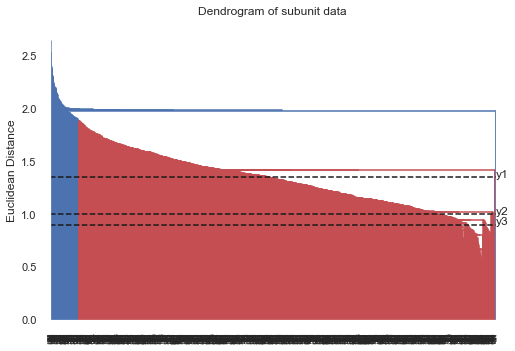

In [3]:
native.get_dendrogram(list_18, y1 = 1.35, y2 = 1, y3 = 0.9)

As indicated by the colors, the algorithm would make 2 clusters, but other treshold lines (dashed on the plot) can be set:

* y1: for 3 clusters

* y2: for 4 clusters

* y3: for 5 clusters

The best number is now determined by trying it and judging the visualization.

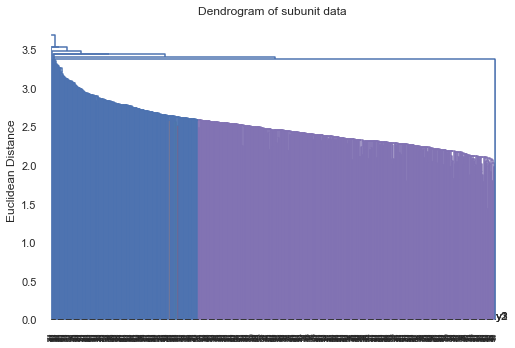

In [4]:
native.get_dendrogram(list_25)

The algorithm would make 2 clusters, and no other values for treshold lines can be clearly set. n_clusters = 2 is then selected.

Plotting with selected parameters:

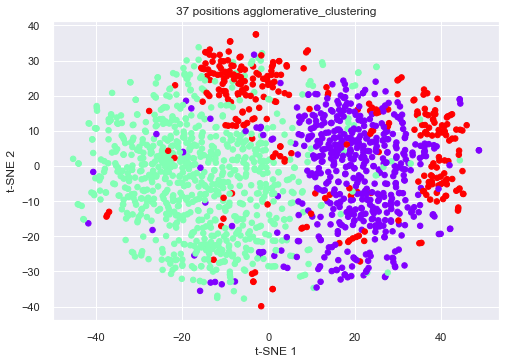

In [5]:
#18S, 3 clusters showed to give the clearest clusters
native.plot_tSNE_reads_covering_positions_data(list_18, 'agglomerative_clustering', n_clusters = 3) 

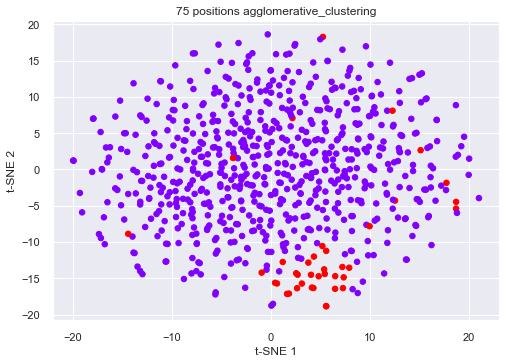

In [6]:
#25S
native.plot_tSNE_reads_covering_positions_data(list_25, 'agglomerative_clustering', n_clusters = 2) 